## Q2. PCA with Missing Values (Synthetic Spectroscopy)

### 🧪 Context
From an atomic spectroscopy experiment, five observables \( X_1, \dots, X_5 \) are generated by two latent factors \( t_1, t_2 \). Some entries in \( X_5 \) are missing due to a spectrometer error. You are given an Excel file with 400 observations named `synthetic-pca-dataset`.

### 🎯 Goal
Handle missing values and compare **covariance vs. correlation PCA**.

---


### ✅ Tasks

#### a) Imputation
- Fill missing values in \( X_5 \) using **mean imputation** (column mean).



In [80]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [81]:
spectro_df = pd.read_excel("synthetic_pca_dataset.xlsx")
spectro_df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5    34
dtype: int64

In [82]:
# mean imputation
spectro_df['X5'] = spectro_df['X5'].fillna(spectro_df['X5'].mean())
spectro_df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

#### b) Two PCAs
- Run:
  - **(i)** Covariance PCA on raw (unstandardized) data  
  - **(ii)** Correlation PCA on standardized data
#### c) Spectrum
- For both (i) and (ii), report:
  - Eigenvalues  
  - Explained variance ratios

#### d) PC Scatter
- Transform data to the first two principal components.
- Plot the **2D projection**.
- Comment briefly on **structure/cluster patterns**.

#### e) Reconstruction (2 PCs)
- Reconstruct the datasets using only the first two PCs.
- Report **average reconstruction MSE** for both (i) and (ii).

#### f) Project New Data
- Show how to project a new sample `x_new` to PC space (both cases).
- Include:
  - Code snippet  
  - Resulting **2D PC coordinates**


In [83]:
#PCA on raw data
pca_cov = PCA(n_components=2)
# PCA on raw data (without scaling)
pca_cov.fit(spectro_df)
eigenvalues = pca_cov.explained_variance_
explained_variance_ratio = pca_cov.explained_variance_ratio_ * 100
cumulative_variance = explained_variance_ratio.cumsum()

spectro_pca_cov = pca_cov.fit_transform(spectro_df)
spectro_pca_cov.shape

(400, 2)

In [84]:
#PCA on normalized data
scaler = StandardScaler()
spectro_scaled = scaler.fit_transform(spectro_df)
pca_corr = PCA(n_components=2)
pca_corr.fit(spectro_scaled)
eigenvalues_corr = pca_corr.explained_variance_
explained_variance_ratio_corr = pca_corr.explained_variance_ratio_ * 100
cumulative_variance_corr = explained_variance_ratio_corr.cumsum()

In [85]:
#MSE calculation
from sklearn.metrics import mean_squared_error
spectro_cov_recon = pca_cov.inverse_transform(spectro_pca_cov)
mse_cov = mean_squared_error(spectro_df, spectro_cov_recon)

spectro_pca_corr = pca_corr.fit_transform(spectro_scaled)
spectro_corr_recon = pca_corr.inverse_transform(spectro_pca_corr)
mse_corr = mean_squared_error(spectro_scaled, spectro_corr_recon)

print(f" PCA on Raw / Unstandardized data \t\t\t\t\t\t PCA on standardized data")
print(f" Top 2 eigen values (raw data): {eigenvalues} \t\t Top eigen values (standardized data): {eigenvalues_corr}")
print(f" Explained variance ratio: {explained_variance_ratio} \t\t\t\t Explained variance ratio: {explained_variance_ratio_corr}")
print(f" Cumulative variance ratio: {cumulative_variance} \t\t\t\t Cumulative variance ratio: {cumulative_variance_corr}")
print(f" Average per-sample reconstruction MSE (cov): {mse_cov:.4f} \t \t \t \t Average per-sample reconstruction MSE (corr): {mse_corr:.4f}")

 PCA on Raw / Unstandardized data 						 PCA on standardized data
 Top 2 eigen values (raw data): [10222.07681773   130.40110636] 		 Top eigen values (standardized data): [2.00711927 1.07544716]
 Explained variance ratio: [97.72112084  1.24660991] 				 Explained variance ratio: [40.04202953 21.45517076]
 Cumulative variance ratio: [97.72112084 98.96773075] 				 Cumulative variance ratio: [40.04202953 61.49720029]
 Average per-sample reconstruction MSE (cov): 21.5420 	 	 	 	 Average per-sample reconstruction MSE (corr): 0.3850


#### Observation
- Top 2 Eigen values calculated from PCA on raw data have captured ~99% of total variance in the data resulting with a reconstruction MSE of ~21.5
- Top 2 Eigen values calculated from PCA on standardized data have captured ~61.5% of total variance in the data yielding a lower scala reconstruction MSE of 0.385

Text(0.5, 1.0, 'PCA on standardized data')

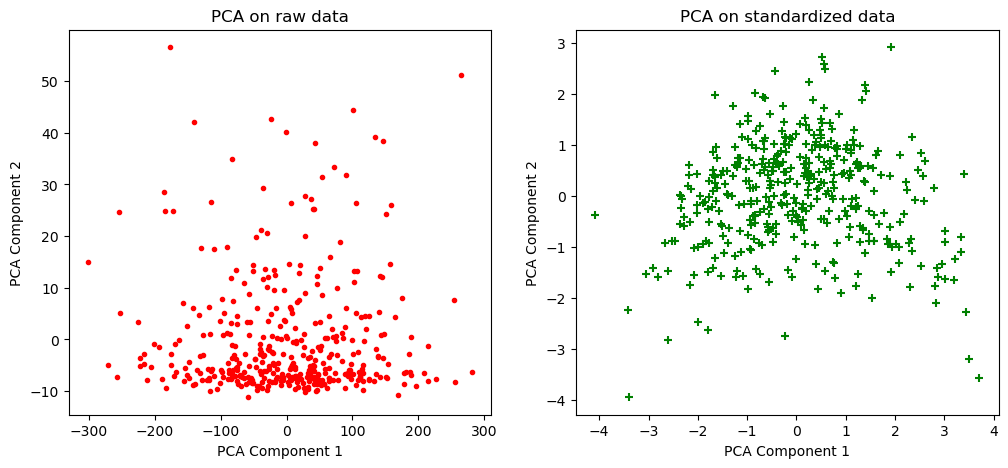

In [86]:
#projections
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
axes[0].scatter(spectro_pca_cov[:,0],spectro_pca_cov[:,1],c='red', marker='.')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].set_title('PCA on raw data')

axes[1].scatter(spectro_pca_corr[:,0],spectro_pca_corr[:,1],c='green', marker='+')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].set_title('PCA on standardized data')